In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the Dataset
df = pd.read_csv('/content/claims.csv')

In [ ]:
# Let's take a look at some few columns of the dataset
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


Dataset Summary

## Data Validation

In [ ]:
# For more convinience I decided to adjust the names of the columns
df = df.rename(columns={'Claim ID': 'claim_id', 'Time to Close': 'time_to_close', 'Claim Amount': 'claim_amount', 'Amount Paid':'amount_paid', 'Location':'location',
       'Individuals on Claim':'individuals_on_claim', 'Linked Cases':'linked_cases', 'Cause':'cause'})

In [ ]:
# What are the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              98 non-null     object 
 1   time_to_close         98 non-null     int64  
 2   claim_amount          98 non-null     object 
 3   amount_paid           98 non-null     float64
 4   location              98 non-null     object 
 5   individuals_on_claim  98 non-null     int64  
 6   linked_cases          98 non-null     bool   
 7   cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [ ]:
# Print all the column names
df.columns.unique()

Index(['claim_id', 'time_to_close', 'claim_amount', 'amount_paid', 'location',
       'individuals_on_claim', 'linked_cases', 'cause'],
      dtype='object')

In [ ]:
# Correct the claim amount columns to the numeric as per criteria
df['claim_amount'] = df['claim_amount'].str.replace('$', '')
df['claim_amount'] = df['claim_amount'].str.replace(',', '')
df['claim_amount'] = df['claim_amount'].str.strip('R')
df['claim_amount'] = df['claim_amount'].astype('float')

<ipython-input-41-7ebe04e2a4de>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['claim_amount'] = df['claim_amount'].str.replace('$', '')


In [ ]:
# Fill the null row with 'unknown' in the cause column
df['cause'] = df['cause'].fillna('unknown')

In [ ]:
# check for the minimum value
df.time_to_close.min()

-57

In [ ]:
# what row has negative value of time to close case?
df[df.time_to_close<0]

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
58,0000000-00.2019.0.00.0079,-57,3672.0,999.68,SAO LUIS,0,False,unknown


In [ ]:
# Change the negative value to positive
df['time_to_cloae'] = df['time_to_close'].iloc[[58]] = 57

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df[df.time_to_close<0]

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause,time_to_cloae


In [ ]:
# what is the minimum value
df.claim_amount.min()

3555.0

In [ ]:
# check for the minimum value
df.amount_paid.min()

999.68

In [ ]:
# what is the smallest value?
df.individuals_on_claim.min()

0

In [ ]:
# Take a look at first few columns again
df.iloc[51:60]

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause,time_to_cloae
51,0000000-00.2019.0.00.0065,675,75000.0,35291.54,RECIFE,3,False,vegetables,57
52,0000000-00.2019.0.00.0052,638,37464.0,15860.55,FORTALEZA,1,False,unknown,57
53,0000000-00.2019.0.00.0001,659,10428.0,1722.04,RECIFE,0,False,unknown,57
54,0000000-00.2019.0.00.0060,642,363746.0,177379.01,NATAL,15,True,unknown,57
55,0000000-00.2019.0.00.0047,625,136367.0,67176.37,SAO LUIS,5,False,vegetables,57
56,0000000-00.2019.0.00.0054,584,38000.0,25864.34,FORTALEZA,1,False,unknown,57
57,0000000-00.2019.0.00.0078,495,6691.0,4154.22,FORTALEZA,0,False,unknown,57
58,0000000-00.2019.0.00.0079,57,3672.0,999.68,SAO LUIS,0,False,unknown,57
59,0000000-00.2019.0.00.0009,634,754317.0,145843.76,NATAL,33,True,meat,57


In [ ]:
df.linked_cases.unique()

array([False,  True])

In [ ]:
df.cause.unique()

array(['unknown', 'vegetables', 'meat'], dtype=object)

In [ ]:
df.location.unique()

array(['RECIFE', 'SAO LUIS', 'FORTALEZA', 'NATAL'], dtype=object)

In [ ]:
# Check for empty data
df.isnull().sum()

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
time_to_cloae           0
dtype: int64

In [ ]:
# Check whether there are duplicates
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              98 non-null     object 
 1   time_to_close         98 non-null     int64  
 2   claim_amount          98 non-null     float64
 3   amount_paid           98 non-null     float64
 4   location              98 non-null     object 
 5   individuals_on_claim  98 non-null     int64  
 6   linked_cases          98 non-null     bool   
 7   cause                 98 non-null     object 
 8   time_to_cloae         98 non-null     int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 6.3+ KB


In [ ]:
# What is the shape of the DataFrame
df.shape

(98, 9)

In [ ]:
# Calculate summary statistics of the DataFrame
df.describe(include='all')

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause,time_to_cloae
count,98,98.000000,98.000000,98.000000,98,98.000000,98,98,98.0
unique,98,NaN,NaN,NaN,4,NaN,2,3,NaN
top,0000000-00.2010.0.00.0094,NaN,NaN,NaN,SAO LUIS,NaN,False,unknown,NaN
freq,1,NaN,NaN,NaN,30,NaN,89,78,NaN
mean,NaN,833.510204,122952.030612,58448.238571,NaN,4.908163,NaN,NaN,57.0
std,NaN,685.424441,166433.389040,87525.873849,NaN,7.292259,NaN,NaN,0.0
min,NaN,29.000000,3555.000000,999.680000,NaN,0.000000,NaN,NaN,57.0
25%,NaN,340.750000,40000.000000,15965.642500,NaN,1.000000,NaN,NaN,57.0
50%,NaN,638.500000,58454.500000,29451.040000,NaN,2.000000,NaN,NaN,57.0
75%,NaN,1138.750000,136573.250000,52114.760000,NaN,5.750000,NaN,NaN,57.0


### Summary of Data Validation




1. The Claim Amount column was converted to numeric data type which was initially stored in character data type. This was done by stripping ('$' and ',') signs from the columns then converting numeric as required by the criteria. Additionally, there were null values in the Cause column, those values were replaced with 'unknown'. All other columns were recorded correctly as per criteria. Also the values in row with index 58 of the time to close column was corrected because it was recorded wrongly as days cannot be negative. This was done by changing the values to positive.
2. The locations are 'RECIFE', 'SAO LUIS', 'FORTALEZA', and 'NATAL'. The three causes of the poisoning are 'unknown', 'vegetables', and 'meat'. A case is either linked or not (True or False).
3.  No duplicates were found, no null values and also the data set have 98 rows and 8 columns. There are 98 rows and 8 columns









## Exploratory Analysis

### 1. How does the number of claims differ across locations?

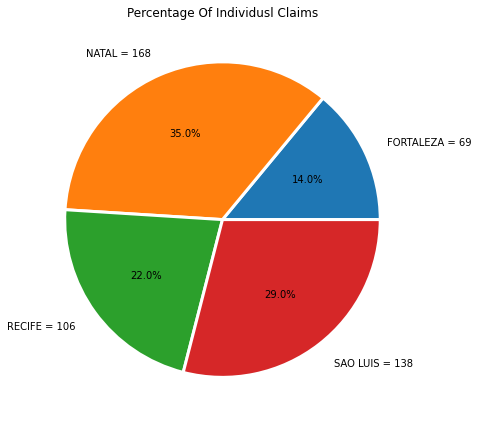

In [ ]:
# How does the number of claims differs across each location
claim_count = df.groupby('location')['individuals_on_claim'].sum()
a = [14, 35, 22, 29]
b = ['FORTALEZA = 69', 'NATAL = 168', 'RECIFE = 106', 'SAO LUIS = 138']
# Create a pieplot

# Label distance: gives the space between labels and the center of the pie
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(a, labels=b, autopct='%.1f%%', labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax.set_title('Percentage Of Individusl Claims')
plt.tight_layout()
plt.show();


There are total of 481 cases across 4 locations ('RECIFE', 'SAO LUIS', 'FORTALEZA', and 'NATAL). Out of the 481 cases filed, NATAL is the location with the most, with 168 cases filed approximately 35 percent of the total cases. SAO LUIS came second with 138 cases, approximately 29 percent of the total cases, followed by RECIFE, which has 106 cases, approximately 22 percent of the total cases and then lastly the location with less cases filed FORTALEZA with 69 cases which is approximately 14 percent of the total cases filed

## What is the distribution of time to close claims?

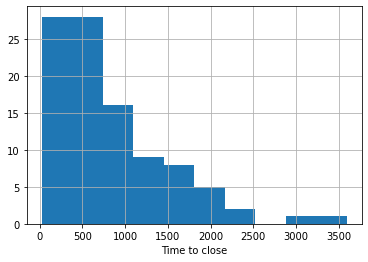

In [ ]:
# Distribution of time to close claims
df['time_to_close'].hist()
plt.xlabel('Time to close')
plt.show()

<Figure size 864x576 with 0 Axes>

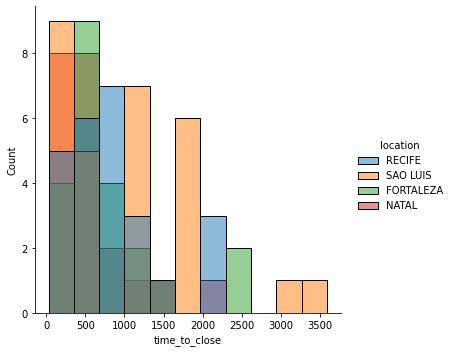

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(x='time_to_close', data=df, hue='location')
plt.show()

The time to close cases ranges from 29 days to 3591 days. It took mostly between 0 to 500 daysto close a claim. SAO LUIS is the location with the heighest distribution of time to close a claim

### Let's see the distribution of the 3 causes of poison

unknown       78
meat          12
vegetables     8
Name: cause, dtype: int64


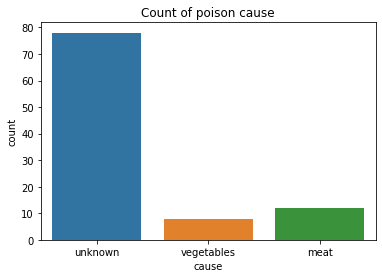

In [ ]:
plt.title('Count of poison cause')
sns.countplot(x='cause', data=df)
print(df['cause'].value_counts())

Clearly from above, the plot shows most causes of food poisoning are unknown. It would be best adviced to deploy the legal team to investigate further to know the mysterios cause of the poisoning.

## Distribution of number of days it takes to close claims across the four locations

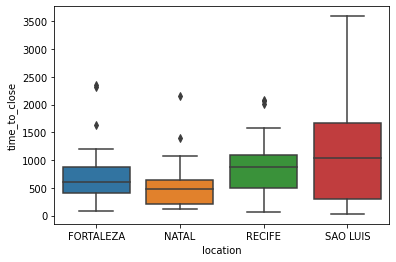

In [ ]:
sns.boxplot(x="location", y='time_to_close', data = df, order = sorted(df["location"].unique()))

In [ ]:
# dist_loc = sns.FacetGrid(df, col='location')
# dist_loc.map_dataframe(sns.histplot, x='time_to_close')

More effort is needed to be put in SAO LUIS because the performance there is very poor when it comes to the closing of cases filed. Then RECIFE should be looked afterwards because of the distribution of the days taken there is also high. FORTALEZA performed significantly better than the two previous locations when it comes to case closure. NATAL has the best record in terms of handling cases

## How does the average time to close claims differ by location?

#### Let's see which location has the most number of poison claim due to unknown cause

location
FORTALEZA     56
NATAL        125
RECIFE        57
SAO LUIS      75
Name: individuals_on_claim, dtype: int64


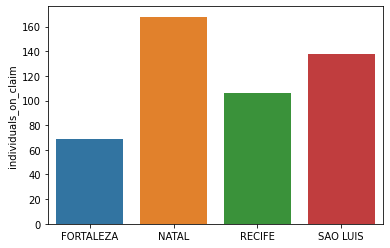

In [ ]:
a = df.query('cause == "unknown"')
b = a.groupby('location')['individuals_on_claim'].sum()
print(b)
c = sns.barplot(x = sorted(df["location"].unique()), y = df.groupby('location')['individuals_on_claim'].agg(np.sum))

NATAL has the most claims with unknown cause. More effort should be put to discover what precisely is the main poison cause.

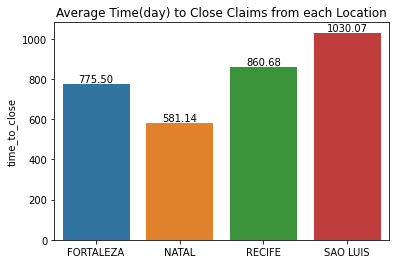

In [ ]:
a = df.groupby('location')['time_to_close'].agg(np.mean)
plt.title('Average Time(day) to Close Claims from each Location')
chart = sns.barplot(x = sorted(df["location"].unique()), y = df.groupby('location')['time_to_close'].agg(np.mean))
for p in chart.patches:
  chart.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.,
                                             p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

Seeing the above graph, one will wonder how the resturant in NATAL with the most number of claims filed were able to perform best when it comes to handling claim closure. This shows how efficient the legal team there are when it comes to handling cases. FORTALEZA came next even though they had the less number of claims, the performance there could be considered average. More efforts are required in te other two locations (RECIFE and SAO LUIS) especially SAO LUIS which's second in terms of number of claims filed and worse when it comes to closing claims.

### Let's see how time to close case is correlated with the amount claimed

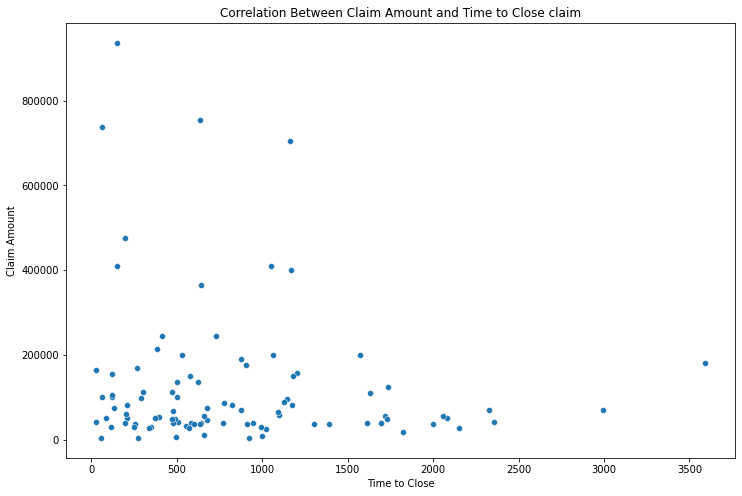

In [ ]:
plt.figure(figsize=[12,8])
sns.scatterplot(data=df, x="time_to_close", y="claim_amount")
plt.xlabel("Time to Close")
plt.ylabel("Claim Amount")
plt.title('Correlation Between Claim Amount and Time to Close claim')
plt.show()

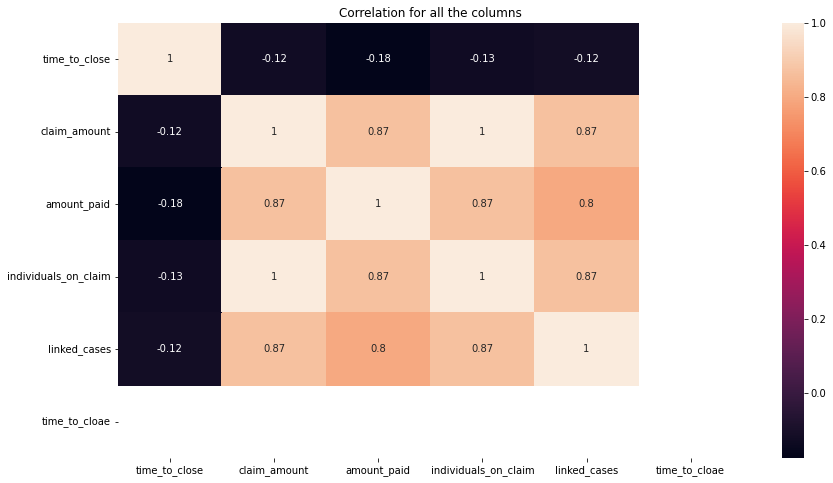

In [ ]:
plt.figure(figsize=[14,8])
plt.title('Correlation for all the columns')
sns.heatmap(df.corr(), annot=True)
plt.show()

## Summary
<br>
<br>
<br>
<br>
<br>

1.   Data Validation
For convinience, I decided to turn all column names to small letters and also replace spaces with underscore. The Claim Amount column was stored as string and also has some characters ($ and ,) stored in it, which were removed before turning it into numeric data type as required. The null rows in cause columns were replaced with 'unknown' and I went further to explore the dataset, discovering row 58 which has number of days stored in negative.
2.   Exploratory Data Analysis
3.   
4.   
5.   The legal team in SAO LUIS should double their effort in tackling claim cases, because the record there is not very good.


